Decision Tree: R² = 0.9841, MSE = 0.1153
Random Forest: R² = 0.9851, MSE = 0.1083
XGBoost: R² = 0.9803, MSE = 0.1429
SVR: R² = 0.8534, MSE = 1.0642

Additional Metrics:
Decision Tree -> MAE: 0.0902, RMSE: 0.3395, MAPE: 1.40%
Random Forest -> MAE: 0.0955, RMSE: 0.3291, MAPE: 1.60%
XGBoost       -> MAE: 0.1318, RMSE: 0.3781, MAPE: 2.35%
SVR           -> MAE: 0.5025, RMSE: 1.0316, MAPE: 9.52%


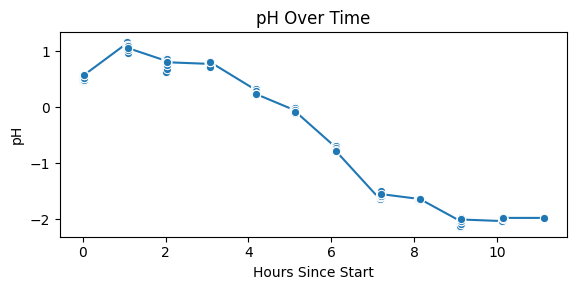

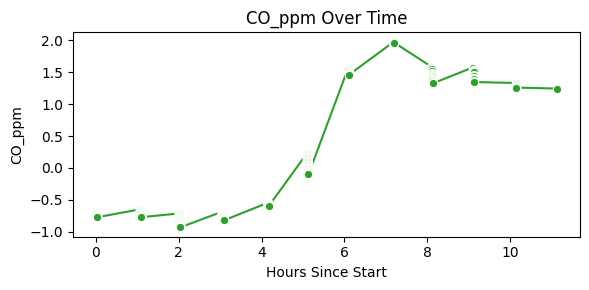

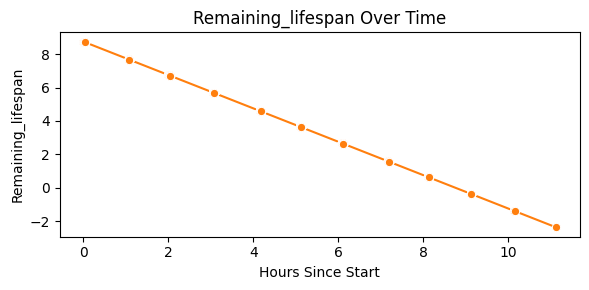

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import seaborn as sns
import matplotlib.pyplot as plt

# Load Excel file with correct engine
file_path = r"C:\Users\hp\Downloads\final_data_with_timestamp(raw).xlsx"
df = pd.read_excel(file_path, engine='openpyxl')

# Rename columns for compatibility
df.columns = df.columns.str.strip().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

# Drop rows with missing values
df.dropna(inplace=True)

# Ensure Timestamp is datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Sort by Timestamp
df.sort_values('Timestamp', inplace=True)

# Add feature: Hours since start
df['Hours_since_start'] = (df['Timestamp'] - df['Timestamp'].iloc[0]).dt.total_seconds() / 3600.0

# Define features and target
features = ['pH', 'CO_ppm']
target = 'Remaining_lifespan'

# Standardize features
scaler = StandardScaler()
df[features] = scaler.fit_transform(df[features])

# Split into train/test
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train models
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

svr_model = SVR()
svr_model.fit(X_train, y_train)
y_pred_svr = svr_model.predict(X_test)

# Evaluation function
def evaluate_model(name, y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    print(f"{name}: R² = {r2:.4f}, MSE = {mse:.4f}")

# Evaluate models
evaluate_model("Decision Tree", y_test, y_pred_dt)
evaluate_model("Random Forest", y_test, y_pred_rf)
evaluate_model("XGBoost", y_test, y_pred_xgb)
evaluate_model("SVR", y_test, y_pred_svr)

# Calculate and print additional metrics
def mape(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mae_scores = [
    mean_absolute_error(y_test, y_pred_dt),
    mean_absolute_error(y_test, y_pred_rf),
    mean_absolute_error(y_test, y_pred_xgb),
    mean_absolute_error(y_test, y_pred_svr)
]

rmse_scores = [
    mean_squared_error(y_test, y_pred_dt, squared=False),
    mean_squared_error(y_test, y_pred_rf, squared=False),
    mean_squared_error(y_test, y_pred_xgb, squared=False),
    mean_squared_error(y_test, y_pred_svr, squared=False)
]

mape_scores = [
    mape(y_test, y_pred_dt),
    mape(y_test, y_pred_rf),
    mape(y_test, y_pred_xgb),
    mape(y_test, y_pred_svr)
]

print("\nAdditional Metrics:")
print(f"Decision Tree -> MAE: {mae_scores[0]:.4f}, RMSE: {rmse_scores[0]:.4f}, MAPE: {mape_scores[0]:.2f}%")
print(f"Random Forest -> MAE: {mae_scores[1]:.4f}, RMSE: {rmse_scores[1]:.4f}, MAPE: {mape_scores[1]:.2f}%")
print(f"XGBoost       -> MAE: {mae_scores[2]:.4f}, RMSE: {rmse_scores[2]:.4f}, MAPE: {mape_scores[2]:.2f}%")
print(f"SVR           -> MAE: {mae_scores[3]:.4f}, RMSE: {rmse_scores[3]:.4f}, MAPE: {mape_scores[3]:.2f}%")

# Plotting trends over time
features_to_plot = ['pH', 'CO_ppm', 'Remaining_lifespan']
colors = ['#1f77b4', '#2ca02c', '#ff7f0e']

for feature, color in zip(features_to_plot, colors):
    plt.figure(figsize=(6, 3))
    sns.lineplot(x='Hours_since_start', y=feature, data=df, color=color, marker='o')
    plt.title(f'{feature} Over Time')
    plt.xlabel('Hours Since Start')
    plt.ylabel(feature)
    plt.tight_layout()
    plt.show()


C:\Users\hp\AppData\Local\Temp\ipykernel_9880\2374194152.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=values, palette=palette)


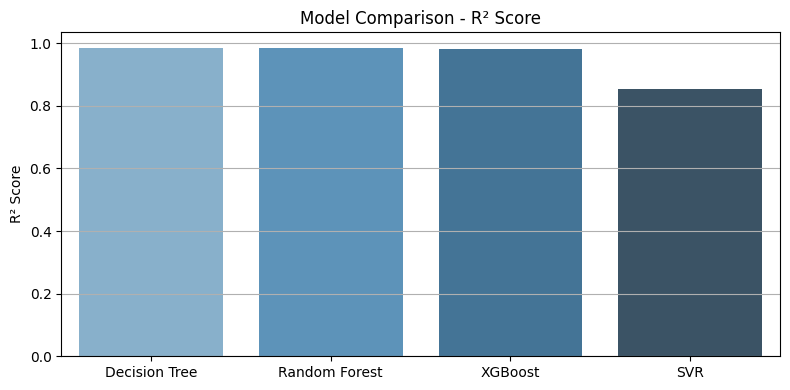

C:\Users\hp\AppData\Local\Temp\ipykernel_9880\2374194152.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=values, palette=palette)


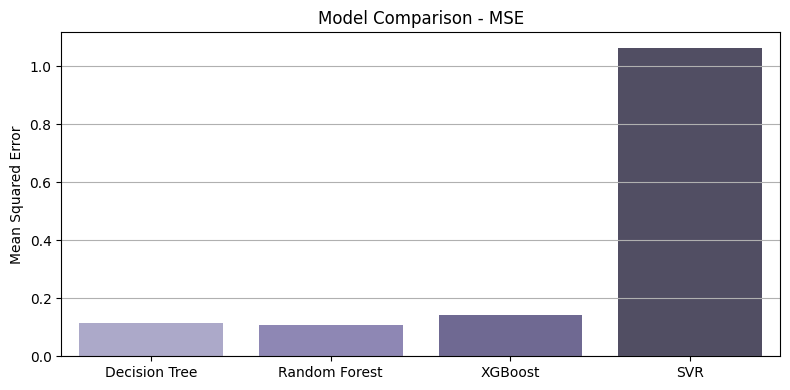

C:\Users\hp\AppData\Local\Temp\ipykernel_9880\2374194152.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=values, palette=palette)


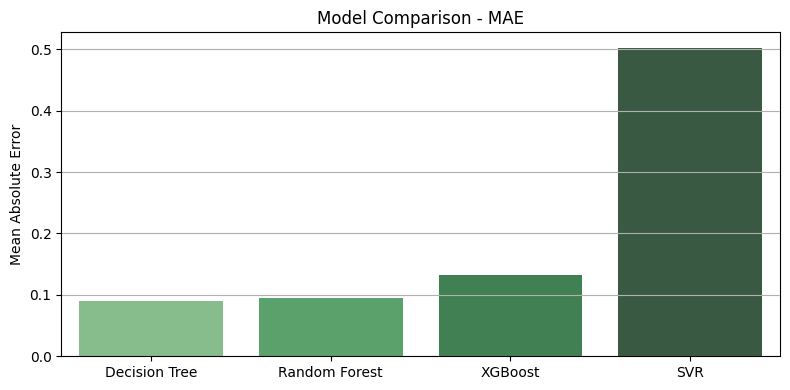

C:\Users\hp\AppData\Local\Temp\ipykernel_9880\2374194152.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=values, palette=palette)


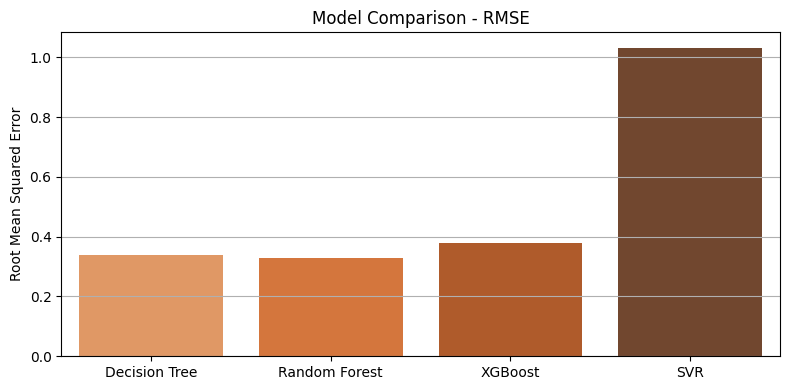

C:\Users\hp\AppData\Local\Temp\ipykernel_9880\2374194152.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=values, palette=palette)


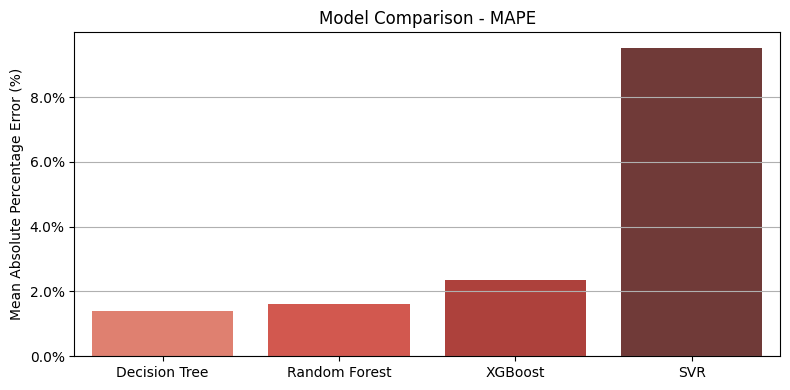

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

# Model names
models = ['Decision Tree', 'Random Forest', 'XGBoost', 'SVR']

# Metrics
r2_scores = [0.9841, 0.9851, 0.9803, 0.8534]
mse_scores = [0.1153, 0.1083, 0.1429, 1.0642]
mae_scores = [0.0902, 0.0955, 0.1318, 0.5025]
rmse_scores = [0.3395, 0.3291, 0.3781, 1.0316]
mape_scores = [1.40, 1.60, 2.35, 9.52]

# Plot helper
def plot_metric(values, title, ylabel, palette, is_percent=False):
    plt.figure(figsize=(8, 4))
    sns.barplot(x=models, y=values, palette=palette)
    plt.title(title)
    plt.ylabel(ylabel)
    if is_percent:
        plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
    plt.grid(True, axis='y')
    plt.tight_layout()
    plt.show()

# Plotting each metric
plot_metric(r2_scores, 'Model Comparison - R² Score', 'R² Score', 'Blues_d')
plot_metric(mse_scores, 'Model Comparison - MSE', 'Mean Squared Error', 'Purples_d')
plot_metric(mae_scores, 'Model Comparison - MAE', 'Mean Absolute Error', 'Greens_d')
plot_metric(rmse_scores, 'Model Comparison - RMSE', 'Root Mean Squared Error', 'Oranges_d')
plot_metric(mape_scores, 'Model Comparison - MAPE', 'Mean Absolute Percentage Error (%)', 'Reds_d', is_percent=True)


Decision Tree: R² = 0.9908, MSE = 0.0991
Random Forest: R² = 0.9910, MSE = 0.0970
XGBoost: R² = 0.9927, MSE = 0.0789
SVR: R² = 0.9923, MSE = 0.0825

Additional Metrics:
Decision Tree -> MAE: 0.0923, RMSE: 0.3148, MAPE: 1.26%
Random Forest -> MAE: 0.0981, RMSE: 0.3114, MAPE: 1.33%
XGBoost       -> MAE: 0.0743, RMSE: 0.2809, MAPE: 1.10%
SVR           -> MAE: 0.1661, RMSE: 0.2873, MAPE: 2.26%


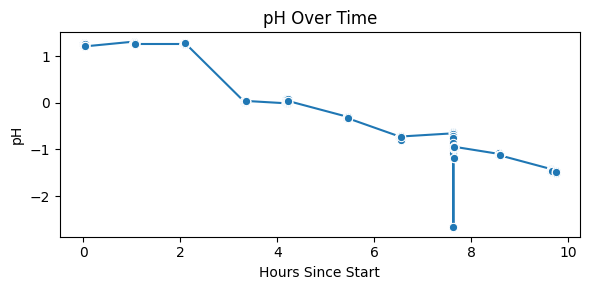

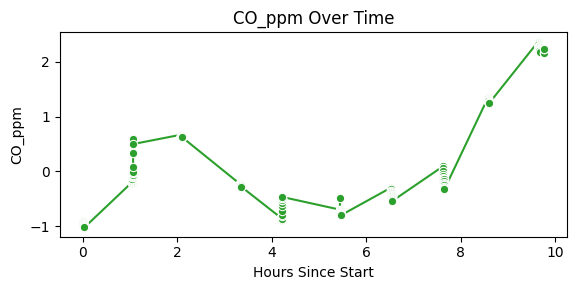

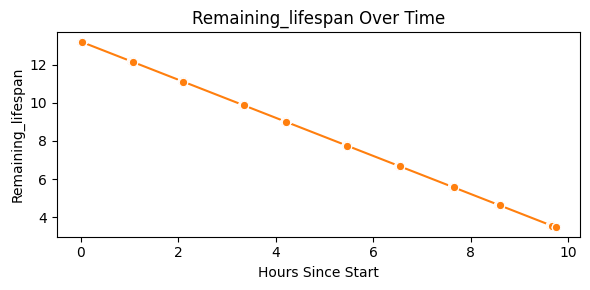

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import seaborn as sns
import matplotlib.pyplot as plt

# Load Excel file with correct engine
file_path = r"C:\Users\hp\Downloads\final_data1_with_timestamp(raw,boiled) (2).xlsx"
df = pd.read_excel(file_path, engine='openpyxl')

# Rename columns for compatibility
df.columns = df.columns.str.strip().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

# Drop rows with missing values
df.dropna(inplace=True)

# Ensure Timestamp is datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Sort by Timestamp
df.sort_values('Timestamp', inplace=True)

# Add feature: Hours since start
df['Hours_since_start'] = (df['Timestamp'] - df['Timestamp'].iloc[0]).dt.total_seconds() / 3600.0

# Define features and target
features = ['pH', 'CO_ppm']
target = 'Remaining_lifespan'

# Standardize features
scaler = StandardScaler()
df[features] = scaler.fit_transform(df[features])

# Split into train/test
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train models
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

svr_model = SVR()
svr_model.fit(X_train, y_train)
y_pred_svr = svr_model.predict(X_test)

# Evaluation function
def evaluate_model(name, y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    print(f"{name}: R² = {r2:.4f}, MSE = {mse:.4f}")

# Evaluate models
evaluate_model("Decision Tree", y_test, y_pred_dt)
evaluate_model("Random Forest", y_test, y_pred_rf)
evaluate_model("XGBoost", y_test, y_pred_xgb)
evaluate_model("SVR", y_test, y_pred_svr)

# Calculate and print additional metrics
def mape(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mae_scores = [
    mean_absolute_error(y_test, y_pred_dt),
    mean_absolute_error(y_test, y_pred_rf),
    mean_absolute_error(y_test, y_pred_xgb),
    mean_absolute_error(y_test, y_pred_svr)
]

rmse_scores = [
    mean_squared_error(y_test, y_pred_dt, squared=False),
    mean_squared_error(y_test, y_pred_rf, squared=False),
    mean_squared_error(y_test, y_pred_xgb, squared=False),
    mean_squared_error(y_test, y_pred_svr, squared=False)
]

mape_scores = [
    mape(y_test, y_pred_dt),
    mape(y_test, y_pred_rf),
    mape(y_test, y_pred_xgb),
    mape(y_test, y_pred_svr)
]

print("\nAdditional Metrics:")
print(f"Decision Tree -> MAE: {mae_scores[0]:.4f}, RMSE: {rmse_scores[0]:.4f}, MAPE: {mape_scores[0]:.2f}%")
print(f"Random Forest -> MAE: {mae_scores[1]:.4f}, RMSE: {rmse_scores[1]:.4f}, MAPE: {mape_scores[1]:.2f}%")
print(f"XGBoost       -> MAE: {mae_scores[2]:.4f}, RMSE: {rmse_scores[2]:.4f}, MAPE: {mape_scores[2]:.2f}%")
print(f"SVR           -> MAE: {mae_scores[3]:.4f}, RMSE: {rmse_scores[3]:.4f}, MAPE: {mape_scores[3]:.2f}%")

# Plotting trends over time
features_to_plot = ['pH', 'CO_ppm', 'Remaining_lifespan']
colors = ['#1f77b4', '#2ca02c', '#ff7f0e']

for feature, color in zip(features_to_plot, colors):
    plt.figure(figsize=(6, 3))
    sns.lineplot(x='Hours_since_start', y=feature, data=df, color=color, marker='o')
    plt.title(f'{feature} Over Time')
    plt.xlabel('Hours Since Start')
    plt.ylabel(feature)
    plt.tight_layout()
    plt.show()


C:\Users\hp\AppData\Local\Temp\ipykernel_21168\1585869991.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=values, palette=palette)


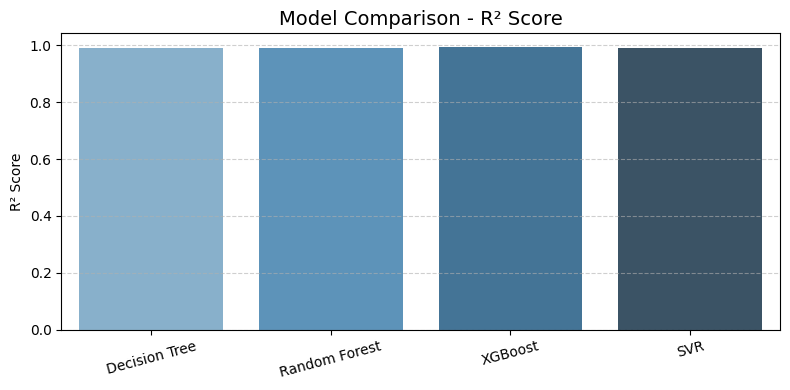

C:\Users\hp\AppData\Local\Temp\ipykernel_21168\1585869991.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=values, palette=palette)


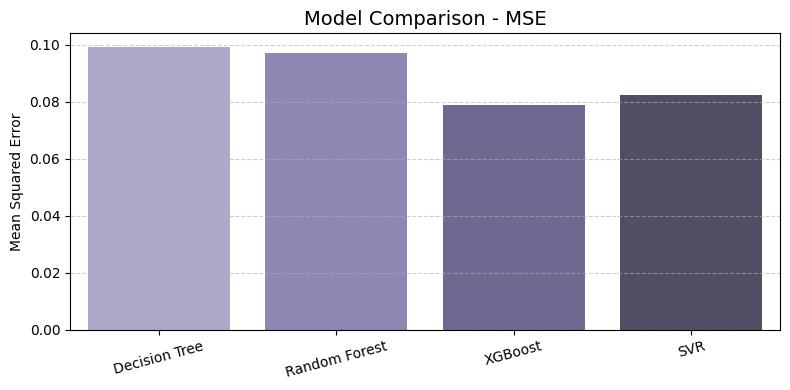

C:\Users\hp\AppData\Local\Temp\ipykernel_21168\1585869991.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=values, palette=palette)


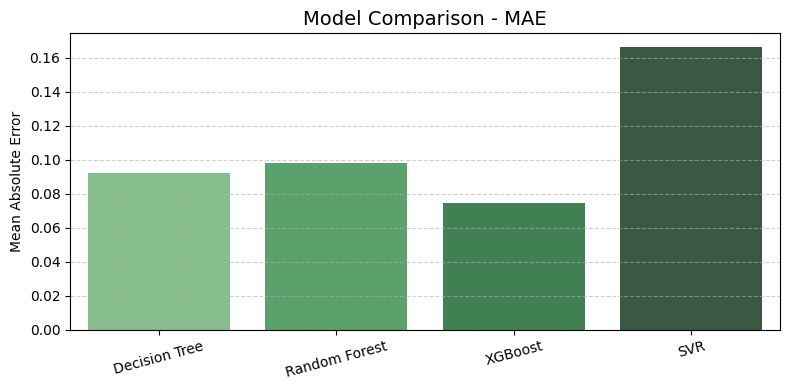

C:\Users\hp\AppData\Local\Temp\ipykernel_21168\1585869991.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=values, palette=palette)


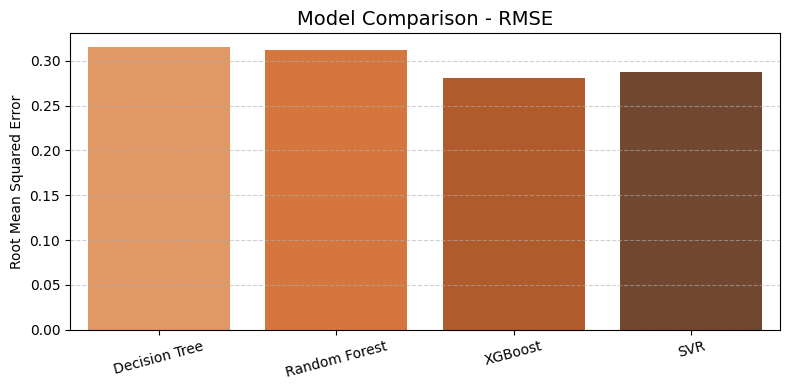

C:\Users\hp\AppData\Local\Temp\ipykernel_21168\1585869991.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=values, palette=palette)


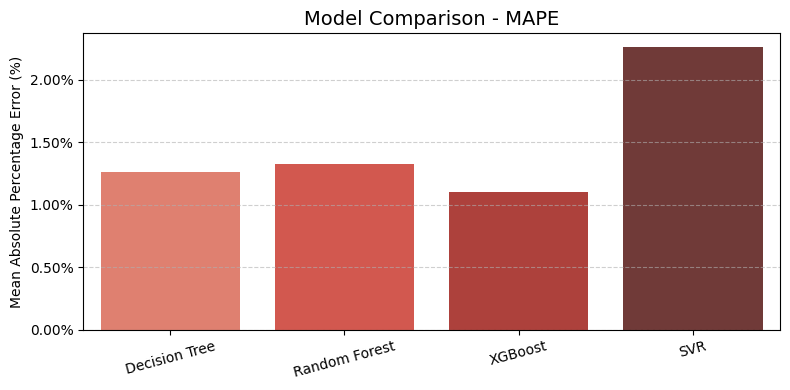

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

# Model names
models = ['Decision Tree', 'Random Forest', 'XGBoost', 'SVR']

# Updated metrics
r2_scores = [0.9908, 0.9910, 0.9927, 0.9923]
mse_scores = [0.0991, 0.0970, 0.0789, 0.0825]
mae_scores = [0.0923, 0.0981, 0.0743, 0.1661]
rmse_scores = [0.3148, 0.3114, 0.2809, 0.2873]
mape_scores = [1.26, 1.33, 1.10, 2.26]

# Plot helper
def plot_metric(values, title, ylabel, palette, is_percent=False):
    plt.figure(figsize=(8, 4))
    sns.barplot(x=models, y=values, palette=palette)
    plt.title(title, fontsize=14)
    plt.ylabel(ylabel)
    plt.xticks(rotation=15)
    if is_percent:
        plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
    plt.grid(True, axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

# Plotting each metric
plot_metric(r2_scores, 'Model Comparison - R² Score', 'R² Score', 'Blues_d')
plot_metric(mse_scores, 'Model Comparison - MSE', 'Mean Squared Error', 'Purples_d')
plot_metric(mae_scores, 'Model Comparison - MAE', 'Mean Absolute Error', 'Greens_d')
plot_metric(rmse_scores, 'Model Comparison - RMSE', 'Root Mean Squared Error', 'Oranges_d')
plot_metric(mape_scores, 'Model Comparison - MAPE', 'Mean Absolute Percentage Error (%)', 'Reds_d', is_percent=True)


In [2]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
import joblib

# Load your raw and boiled milk datasets from Excel files (replace with actual file paths)
raw_df = pd.read_excel('C:\\Users\\hp\\Downloads\\final_data_with_timestamp(raw).xlsx')
boiled_df = pd.read_excel('C:\\Users\\hp\\Downloads\\final_data1_with_timestamp(raw,boiled) (2).xlsx')

# For raw milk
X_raw = raw_df[['pH', 'CO_ppm']]  # Features (pH, CO_ppm)
y_raw = raw_df['Remaining_lifespan']  # Target (Remaining Shelf Life)
scaler_raw = StandardScaler().fit(X_raw)  # Fit the scaler on raw milk data
X_raw_scaled = scaler_raw.transform(X_raw)  # Transform the data for model input

# Train the RandomForest model for raw milk
rf_model_raw = RandomForestRegressor().fit(X_raw_scaled, y_raw)

# Save the scaler and model for raw milk
joblib.dump(scaler_raw, 'scaler_raw.pkl')
joblib.dump(rf_model_raw, 'rf_model_raw.pkl')

# For boiled milk (similar to raw milk model)
X_boiled = boiled_df[['pH', 'CO_ppm']]
y_boiled = boiled_df['Remaining_lifespan']
scaler_boiled = StandardScaler().fit(X_boiled)
X_boiled_scaled = scaler_boiled.transform(X_boiled)
rf_model_boiled = RandomForestRegressor().fit(X_boiled_scaled, y_boiled)

# Save the scaler and model for boiled milk
joblib.dump(scaler_boiled, 'scaler_boiled.pkl')
joblib.dump(rf_model_boiled, 'rf_model_boiled.pkl')


['rf_model_boiled.pkl']

In [13]:
print(raw_df.columns)


Index(['Timestamp', 'Temp', 'pH', 'CO_ppm', 'Remaining_lifespan', 'Status'], dtype='object')


In [ ]:
# import joblib
# import numpy as np

# # Load the pre-trained models for raw and boiled milk
# rf_model_raw = joblib.load('rf_model_raw.pkl')
# scaler_raw = joblib.load('scaler_raw.pkl')

# rf_model_boiled = joblib.load('rf_model_boiled.pkl')
# scaler_boiled = joblib.load('scaler_boiled.pkl')

# def predict_shelf_life(milk_type, pH, CO_ppm):
#     # Check milk type and scale inputs accordingly
#     if milk_type == 'raw':
#         # Prepare input for raw milk
#         input_data = np.array([[pH, CO_ppm]])
#         input_data_scaled = scaler_raw.transform(input_data)
#         predicted_lifespan = rf_model_raw.predict(input_data_scaled)[0]
#     elif milk_type == 'boiled':
#         # Prepare input for boiled milk
#         input_data = np.array([[pH, CO_ppm]])
#         input_data_scaled = scaler_boiled.transform(input_data)
#         predicted_lifespan = rf_model_boiled.predict(input_data_scaled)[0]
#     else:
#         raise ValueError("Invalid milk type. Please choose 'raw' or 'boiled'.")

#     # Set a threshold for "spoiled" milk with very low shelf life
#     # if predicted_lifespan < 3:  # Adjust this threshold as necessary
#     #     predicted_lifespan = 0
#     #     milk_status = "Milk is spoiled."
#     # else:
#     #     # Use your classification logic for fresh vs. not fresh
#     #     if pH < 5.5 and CO_ppm > -13:
#     #         milk_status = "Milk is spoiled."
#     #     elif 5.5 <= pH <= 5.9 and -14.9 < CO_ppm < -12.9:
#     #         milk_status = "Milk is not fresh."
#     #     else:
#     #         milk_status = "Milk is fresh."
    
#     return predicted_lifespan, milk_status

# # Example usage
# milk_type = input("Enter milk type (raw/boiled): ").lower()
# pH = float(input("Enter pH value: "))
# CO_ppm = float(input("Enter CO_ppm value: "))

# predicted_lifespan, milk_status = predict_shelf_life(milk_type, pH, CO_ppm)

# print(f"\nPredicted Remaining Shelf Life: {predicted_lifespan:.2f} hours")
# print(f"Milk Status: {milk_status}")



Predicted Remaining Shelf Life: 2.66 hours
Milk Status: Milk is spoiled.


c:\Users\hp\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
# import pandas as pd
# import numpy as np
# from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
# from sklearn.preprocessing import StandardScaler
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import classification_report
# import joblib

# # Load your raw and boiled milk datasets
# raw_df = pd.read_excel(r'C:\Users\hp\Downloads\final_data_with_timestamp(raw).xlsx', engine='openpyxl')
# boiled_df = pd.read_excel(r'C:\Users\hp\Downloads\final_data1_with_timestamp(raw,boiled) (2).xlsx', engine='openpyxl')

# # Clean column names
# for df in [raw_df, boiled_df]:
#     df.columns = df.columns.str.strip().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
#     df.dropna(inplace=True)

# # Assume the status column is named 'Status' (adjust if different)
# # Verify the column exists
# if 'Status' not in raw_df.columns or 'Status' not in boiled_df.columns:
#     raise ValueError("Status column not found in the dataset. Please check the column name.")

# # Function to train and save models
# def train_and_save_models(df, milk_type, features, lifespan_target, status_target):
#     # Prepare features and targets
#     X = df[features]
#     y_lifespan = df[lifespan_target]
#     y_status = df[status_target]

#     # Scale features
#     scaler = StandardScaler().fit(X)
#     X_scaled = scaler.transform(X)

#     # Train regression model for shelf life
#     rf_regressor = RandomForestRegressor(random_state=42)
#     rf_regressor.fit(X_scaled, y_lifespan)

#     # Train classification model for status
#     rf_classifier = RandomForestClassifier(random_state=42)
#     rf_classifier.fit(X_scaled, y_status)

#     # Save models and scaler
#     joblib.dump(scaler, f'scaler_{milk_type}.pkl')
#     joblib.dump(rf_regressor, f'rf_regressor_{milk_type}.pkl')
#     joblib.dump(rf_classifier, f'rf_classifier_{milk_type}.pkl')

#     # Evaluate classification model (optional)
#     X_train, X_test, y_train_status, y_test_status = train_test_split(
#         X_scaled, y_status, test_size=0.2, random_state=42
#     )
#     y_pred_status = rf_classifier.predict(X_test)
#     print(f"\nClassification Report for {milk_type} Milk Status:")
#     print(classification_report(y_test_status, y_pred_status))

# # Define features and targets
# features = ['pH', 'CO_ppm']
# lifespan_target = 'Remaining_lifespan'
# status_target = 'Status'  # Adjust if the column name is different

# # Train models for raw and boiled milk
# train_and_save_models(raw_df, 'raw', features, lifespan_target, status_target)
# train_and_save_models(boiled_df, 'boiled', features, lifespan_target, status_target)

# # Prediction function
# def predict_shelf_life(milk_type, pH, CO_ppm):
#     # Load models and scaler
#     try:
#         scaler = joblib.load(f'scaler_{milk_type}.pkl')
#         rf_regressor = joblib.load(f'rf_regressor_{milk_type}.pkl')
#         rf_classifier = joblib.load(f'rf_classifier_{milk_type}.pkl')
#     except FileNotFoundError:
#         raise ValueError(f"Models for {milk_type} milk not found. Ensure models are trained and saved.")

#     # Prepare input
#     input_data = np.array([[pH, CO_ppm]])
#     input_data_scaled = scaler.transform(input_data)

#     # Predict shelf life
#     predicted_lifespan = rf_regressor.predict(input_data_scaled)[0]

#     # Predict status
#     predicted_status = rf_classifier.predict(input_data_scaled)[0]

#     return predicted_lifespan, predicted_status

# # Example usage
# try:
#     milk_type = input("Enter milk type (raw/boiled): ").lower()
#     pH = float(input("Enter pH value: "))
#     CO_ppm = float(input("Enter CO_ppm value: "))

#     predicted_lifespan, predicted_status = predict_shelf_life(milk_type, pH, CO_ppm)

#     print(f"\nPredicted Remaining Shelf Life: {predicted_lifespan:.2f} hours")
#     print(f"Milk Status: {predicted_status}")
# except ValueError as e:
#     print(f"Error: {e}")

C:\Users\hp\AppData\Local\Temp\ipykernel_18176\65792173.py:15: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.columns = df.columns.str.strip().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
C:\Users\hp\AppData\Local\Temp\ipykernel_18176\65792173.py:15: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.columns = df.columns.str.strip().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
C:\Users\hp\AppData\Local\Temp\ipykernel_18176\65792173.py:15: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
 


Classification Report for raw Milk Status:
              precision    recall  f1-score   support

       Fresh       1.00      0.94      0.97        32
    Moderate       0.94      1.00      0.97        30
     Spoiled       1.00      1.00      1.00        12

    accuracy                           0.97        74
   macro avg       0.98      0.98      0.98        74
weighted avg       0.97      0.97      0.97        74


Classification Report for boiled Milk Status:
              precision    recall  f1-score   support

       Fresh       1.00      1.00      1.00        22
    Moderate       1.00      1.00      1.00        32
     Spoiled       1.00      1.00      1.00         8

    accuracy                           1.00        62
   macro avg       1.00      1.00      1.00        62
weighted avg       1.00      1.00      1.00        62


Predicted Remaining Shelf Life: 8.74 hours
Milk Status: Fresh


c:\Users\hp\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [7]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import joblib

# Load your raw and boiled milk datasets
raw_df = pd.read_excel(r'C:\Users\hp\Downloads\final_data_with_timestamp(raw).xlsx', engine='openpyxl')
boiled_df = pd.read_excel(r'C:\Users\hp\Downloads\final_data1_with_timestamp(raw,boiled) (2).xlsx', engine='openpyxl')

# Clean column names
for df in [raw_df, boiled_df]:
    df.columns = df.columns.str.strip().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
    df.dropna(inplace=True)

# Verify required columns exist
required_cols = ['Status', 'Remaining_lifespan', 'pH', 'CO_ppm']
for col in required_cols:
    if col not in raw_df.columns or col not in boiled_df.columns:
        raise ValueError(f"Required column '{col}' not found in one of the datasets.")

# Function to train and save models
def train_and_save_models(df, milk_type, features, lifespan_target, status_target):
    X = df[features]
    y_lifespan = df[lifespan_target]
    y_status = df[status_target]

    # Split before scaling to prevent data leakage
    X_train, X_test, y_life_train, y_life_test = train_test_split(X, y_lifespan, test_size=0.2, random_state=42)
    y_status_train = y_status.loc[X_train.index]
    y_status_test = y_status.loc[X_test.index]

    # Scale using training data
    scaler = StandardScaler().fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Train regression model
    rf_regressor = RandomForestRegressor(random_state=42)
    rf_regressor.fit(X_train_scaled, y_life_train)

    # Train classification model
    rf_classifier = RandomForestClassifier(random_state=42)
    rf_classifier.fit(X_train_scaled, y_status_train)

    # Save models and scaler
    joblib.dump(scaler, f'scaler_{milk_type}.pkl')
    joblib.dump(rf_regressor, f'rf_regressor_{milk_type}.pkl')
    joblib.dump(rf_classifier, f'rf_classifier_{milk_type}.pkl')

    # Evaluate classifier
    y_pred_status = rf_classifier.predict(X_test_scaled)
    print(f"\n📊 Classification Report for {milk_type.capitalize()} Milk Status:")
    print(classification_report(y_status_test, y_pred_status))

# Define features and targets
features = ['pH', 'CO_ppm']
lifespan_target = 'Remaining_lifespan'
status_target = 'Status'

# Train and save models
train_and_save_models(raw_df, 'raw', features, lifespan_target, status_target)
train_and_save_models(boiled_df, 'boiled', features, lifespan_target, status_target)

# Prediction function
def predict_shelf_life(milk_type, pH, CO_ppm):
    try:
        scaler = joblib.load(f'scaler_{milk_type}.pkl')
        rf_regressor = joblib.load(f'rf_regressor_{milk_type}.pkl')
        rf_classifier = joblib.load(f'rf_classifier_{milk_type}.pkl')
    except FileNotFoundError:
        raise ValueError(f"Models for {milk_type} milk not found. Ensure models are trained and saved.")

    input_data = np.array([[pH, CO_ppm]])
    input_data_scaled = scaler.transform(input_data)

    predicted_lifespan = rf_regressor.predict(input_data_scaled)[0]
    predicted_status = rf_classifier.predict(input_data_scaled)[0]

    return predicted_lifespan, predicted_status

# Example usage
try:
    milk_type = input("Enter milk type (raw/boiled): ").lower()
    pH = float(input("Enter pH value: "))
    CO_ppm = float(input("Enter CO_ppm value: "))

    predicted_lifespan, predicted_status = predict_shelf_life(milk_type, pH, CO_ppm)

    print(f"\n🕒 Predicted Remaining Shelf Life: {predicted_lifespan:.2f} hours")
    print(f"🥛 Milk Status: {predicted_status}")
except ValueError as e:
    print(f"Error: {e}")


C:\Users\hp\AppData\Local\Temp\ipykernel_11172\1455902182.py:15: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.columns = df.columns.str.strip().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
C:\Users\hp\AppData\Local\Temp\ipykernel_11172\1455902182.py:15: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.columns = df.columns.str.strip().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
C:\Users\hp\AppData\Local\Temp\ipykernel_11172\1455902182.py:15: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=T


📊 Classification Report for Raw Milk Status:
              precision    recall  f1-score   support

       Fresh       1.00      0.84      0.92        32
    Moderate       0.86      1.00      0.92        30
     Spoiled       1.00      1.00      1.00        12

    accuracy                           0.93        74
   macro avg       0.95      0.95      0.95        74
weighted avg       0.94      0.93      0.93        74


📊 Classification Report for Boiled Milk Status:
              precision    recall  f1-score   support

       Fresh       1.00      1.00      1.00        22
    Moderate       1.00      1.00      1.00        32
     Spoiled       1.00      1.00      1.00         8

    accuracy                           1.00        62
   macro avg       1.00      1.00      1.00        62
weighted avg       1.00      1.00      1.00        62


🕒 Predicted Remaining Shelf Life: 7.77 hours
🥛 Milk Status: Moderate


c:\Users\hp\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [12]:
# train_models.py
import pandas as pd
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import joblib

# Load datasets
raw_df = pd.read_excel(r'C:\Users\hp\Downloads\final_data_with_timestamp(raw).xlsx', engine='openpyxl')
boiled_df = pd.read_excel(r'C:\Users\hp\Downloads\final_data1_with_timestamp(raw,boiled) (2).xlsx', engine='openpyxl')

# Clean column names
for df in [raw_df, boiled_df]:
    df.columns = df.columns.str.strip().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
    df.dropna(inplace=True)

# Training function
def train_and_save_models(df, milk_type, features, lifespan_target, status_target):
    X = df[features]
    y_lifespan = df[lifespan_target]
    y_status = df[status_target]
    scaler = StandardScaler().fit(X)
    X_scaled = scaler.transform(X)
    rf_regressor = RandomForestRegressor(random_state=42)
    rf_regressor.fit(X_scaled, y_lifespan)
    rf_classifier = RandomForestClassifier(random_state=42)
    rf_classifier.fit(X_scaled, y_status)
    joblib.dump(scaler, f'scaler_{milk_type}.pkl')
    joblib.dump(rf_regressor, f'rf_regressor_{milk_type}.pkl')
    joblib.dump(rf_classifier, f'rf_classifier_{milk_type}.pkl')
    print(f"Models saved for {milk_type} milk")

# Define features and targets
features = ['pH', 'CO_ppm']
lifespan_target = 'Remaining_lifespan'
status_target = 'Status'  # Replace with your actual Status column name

# Train and save models
train_and_save_models(raw_df, 'raw', features, lifespan_target, status_target)
train_and_save_models(boiled_df, 'boiled', features, lifespan_target, status_target)

C:\Users\hp\AppData\Local\Temp\ipykernel_18176\629487679.py:13: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.columns = df.columns.str.strip().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
C:\Users\hp\AppData\Local\Temp\ipykernel_18176\629487679.py:13: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.columns = df.columns.str.strip().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
C:\Users\hp\AppData\Local\Temp\ipykernel_18176\629487679.py:13: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True

Models saved for raw milk
Models saved for boiled milk


In [2]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import joblib

# Load your raw and boiled milk datasets
raw_df = pd.read_excel(r'C:\Users\hp\Downloads\final_data_with_timestamp(raw).xlsx', engine='openpyxl')
boiled_df = pd.read_excel(r'C:\Users\hp\Downloads\final_data1_with_timestamp(raw,boiled) (2).xlsx', engine='openpyxl')

# Clean column names
for df in [raw_df, boiled_df]:
    df.columns = df.columns.str.strip().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
    df.dropna(inplace=True)

# Verify required columns exist
required_cols = ['Status', 'Remaining_lifespan', 'pH', 'CO_ppm']
for col in required_cols:
    if col not in raw_df.columns or col not in boiled_df.columns:
        raise ValueError(f"Required column '{col}' not found in one of the datasets.")

# Function to train and save models
def train_and_save_models(df, milk_type, features, lifespan_target, status_target):
    X = df[features]
    y_lifespan = df[lifespan_target]
    y_status = df[status_target]

    # Split before scaling to prevent data leakage
    X_train, X_test, y_life_train, y_life_test = train_test_split(X, y_lifespan, test_size=0.2, random_state=42)
    y_status_train = y_status.loc[X_train.index]
    y_status_test = y_status.loc[X_test.index]

    # Scale using training data
    scaler = StandardScaler().fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Train regression model
    rf_regressor = RandomForestRegressor(random_state=42)
    rf_regressor.fit(X_train_scaled, y_life_train)

    # Train classification model
    rf_classifier = RandomForestClassifier(random_state=42)
    rf_classifier.fit(X_train_scaled, y_status_train)

    # Save models and scaler
    joblib.dump(scaler, f'scaler_{milk_type}.pkl')
    joblib.dump(rf_regressor, f'rf_regressor_{milk_type}.pkl')
    joblib.dump(rf_classifier, f'rf_classifier_{milk_type}.pkl')

    # Evaluate classifier
    y_pred_status = rf_classifier.predict(X_test_scaled)
    print(f"\n📊 Classification Report for {milk_type.capitalize()} Milk Status:")
    print(classification_report(y_status_test, y_pred_status))

# Define features and targets
features = ['pH', 'CO_ppm']
lifespan_target = 'Remaining_lifespan'
status_target = 'Status'

# Train and save models
train_and_save_models(raw_df, 'raw', features, lifespan_target, status_target)
train_and_save_models(boiled_df, 'boiled', features, lifespan_target, status_target)

# Prediction function
def predict_shelf_life(milk_type, pH, CO_ppm):
    try:
        scaler = joblib.load(f'scaler_{milk_type}.pkl')
        rf_regressor = joblib.load(f'rf_regressor_{milk_type}.pkl')
        rf_classifier = joblib.load(f'rf_classifier_{milk_type}.pkl')
    except FileNotFoundError:
        raise ValueError(f"Models for {milk_type} milk not found. Ensure models are trained and saved.")

    input_data = np.array([[pH, CO_ppm]])
    input_data_scaled = scaler.transform(input_data)

    predicted_lifespan = rf_regressor.predict(input_data_scaled)[0]
    predicted_status = rf_classifier.predict(input_data_scaled)[0]

    return predicted_lifespan, predicted_status

# Example usage
try:
    milk_type = input("Enter milk type (raw/boiled): ").lower()
    pH = float(input("Enter pH value: "))
    CO_ppm = float(input("Enter CO_ppm value: "))

    predicted_lifespan, predicted_status = predict_shelf_life(milk_type, pH, CO_ppm)

    print(f"\n🕒 Predicted Remaining Shelf Life: {predicted_lifespan:.2f} hours")
    print(f"🥛 Milk Status: {predicted_status}")
except ValueError as e:
    print(f"Error: {e}")


C:\Users\hp\AppData\Local\Temp\ipykernel_11172\1455902182.py:15: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.columns = df.columns.str.strip().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
C:\Users\hp\AppData\Local\Temp\ipykernel_11172\1455902182.py:15: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.columns = df.columns.str.strip().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
C:\Users\hp\AppData\Local\Temp\ipykernel_11172\1455902182.py:15: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=T


📊 Classification Report for Raw Milk Status:
              precision    recall  f1-score   support

       Fresh       1.00      0.84      0.92        32
    Moderate       0.86      1.00      0.92        30
     Spoiled       1.00      1.00      1.00        12

    accuracy                           0.93        74
   macro avg       0.95      0.95      0.95        74
weighted avg       0.94      0.93      0.93        74


📊 Classification Report for Boiled Milk Status:
              precision    recall  f1-score   support

       Fresh       1.00      1.00      1.00        22
    Moderate       1.00      1.00      1.00        32
     Spoiled       1.00      1.00      1.00         8

    accuracy                           1.00        62
   macro avg       1.00      1.00      1.00        62
weighted avg       1.00      1.00      1.00        62

Error: could not convert string to float: 'boiled'
